In [70]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame


In [71]:
#load of the Dataframe
vw_df = pd.read_csv('vw2__auction.csv')
porsche_df = pd.read_csv('porsche_auctionv2.csv')
triumph_df = pd.read_csv('triumph_auction.csv')
print("vw_df shape:",vw_df.shape)
print("porsche_df shape: ",porsche_df.shape)
print("triumph_df shape:",triumph_df.shape)


vw_df shape: (469, 11)
porsche_df shape:  (1856, 11)
triumph_df shape: (410, 11)


In [72]:
#Merge of the Dataframe
frames = [vw_df, porsche_df, triumph_df]
df = pd.concat(frames)
print("auction shape:", df.shape)

auction shape: (2735, 11)


In [73]:
data_top = df.head()
print(data_top)


  auction_brand auction_date auction_location         auction_model  \
0           NaN          NaN              NaN                   NaN   
1    VOLKSWAGEN   08/02/2019            Paris  Typ 166 Schwimmwagen   
2    VOLKSWAGEN   25/03/2013        Bruxelles  Typ 166 Schwimmwagen   
3    VOLKSWAGEN   12/08/2012           Nysted  Typ 166 Schwimmwagen   
4    VOLKSWAGEN   13/11/2009           Le Gua  Typ 166 Schwimmwagen   

         auction_organizor auction_price auction_restauration_code  \
0                      NaN           NaN                       NaN   
1                Artcurial     119 200 €                      REST   
2  Pierre Bergé & Associés     132 000 €                     REST+   
3              RM Auctions     112 560 €                       RAR   
4        Hermann Historica      84 000 €                      REST   

  auction_sales_code  model quote_id  year  
0                NaN    NaN     6968   NaN  
1                  V    NaN     6968   NaN  
2                

In [74]:
df['auction_brand'] = df['auction_brand'].astype(str)
df['auction_date'] = pd.to_datetime(df['auction_date'], format= '%d/%m/%Y')
df['auction_restauration_code']= df['auction_restauration_code'].astype(str)

In [75]:
print (df.dtypes)
print(df.shape)

auction_brand                        object
auction_date                 datetime64[ns]
auction_location                     object
auction_model                        object
auction_organizor                    object
auction_price                        object
auction_restauration_code            object
auction_sales_code                   object
model                               float64
quote_id                             object
year                                float64
dtype: object
(2735, 11)


In [76]:
df = df.drop(columns=['year', 'model'])

In [77]:
df = df[df['auction_price'].notna()]
df['auction_price']= df['auction_price'].str.replace(" ", "")
df['auction_price']= df['auction_price'].str.replace("€", "")
df['auction_price'] = df['auction_price'].astype(float)
print(df)

    auction_brand auction_date auction_location  \
1      VOLKSWAGEN   2019-02-08            Paris   
2      VOLKSWAGEN   2013-03-25        Bruxelles   
3      VOLKSWAGEN   2012-08-12           Nysted   
4      VOLKSWAGEN   2009-11-13           Le Gua   
5      VOLKSWAGEN   2008-06-14           Le Gua   
..            ...          ...              ...   
404       TRIUMPH   2007-09-15           Toffen   
405       TRIUMPH   2007-02-19       Blackbushe   
406       TRIUMPH   2006-09-16           Toffen   
408       TRIUMPH   2009-07-19          Uzerche   
409       TRIUMPH   2007-04-18           Buxton   

                                  auction_model  \
1                          Typ 166 Schwimmwagen   
2                          Typ 166 Schwimmwagen   
3                          Typ 166 Schwimmwagen   
4                          Typ 166 Schwimmwagen   
5                        Typ 166 "Schwimmwagen"   
..                                          ...   
404       Dolomite Sprint berl

In [78]:
df.auction_price.describe()

count    2.405000e+03
mean     1.513467e+05
std      4.415144e+05
min      0.000000e+00
25%      1.511000e+04
50%      4.100000e+04
75%      1.203600e+05
max      9.109012e+06
Name: auction_price, dtype: float64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2405 entries, 1 to 409
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   auction_brand              2405 non-null   object        
 1   auction_date               2405 non-null   datetime64[ns]
 2   auction_location           2405 non-null   object        
 3   auction_model              2405 non-null   object        
 4   auction_organizor          2405 non-null   object        
 5   auction_price              2405 non-null   float64       
 6   auction_restauration_code  2405 non-null   object        
 7   auction_sales_code         2405 non-null   object        
 8   quote_id                   2405 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 187.9+ KB


In [80]:
df.head()


,auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_price,auction_restauration_code,auction_sales_code,quote_id
1,VOLKSWAGEN,2019-02-08,Paris,Typ 166 Schwimmwagen,Artcurial,119200.0,REST,V,6968
2,VOLKSWAGEN,2013-03-25,Bruxelles,Typ 166 Schwimmwagen,Pierre Bergé & Associés,132000.0,REST+,V,6968
3,VOLKSWAGEN,2012-08-12,Nysted,Typ 166 Schwimmwagen,RM Auctions,112560.0,RAR,V,6968
4,VOLKSWAGEN,2009-11-13,Le Gua,Typ 166 Schwimmwagen,Hermann Historica,84000.0,REST,V,6968
5,VOLKSWAGEN,2008-06-14,Le Gua,"Typ 166 ""Schwimmwagen""",Hermann Historica,120000.0,REST,V,6968


In [81]:
sorted(df.auction_brand.unique())

['PORSCHE', 'TRIUMPH', 'VOLKSWAGEN']

In [82]:
#cleaning of location
df.auction_location = df.auction_location.str.upper()

def clean_name(a,b):
    df.auction_location.replace(a,b,inplace=True)

clean_name('AmeliA IslAnd','Amelia Island')
clean_name('Ascot', 'Ascott')
clean_name('Auvers sur Oise','Auvers-sur-Oise')
clean_name('EsvrEs sur IndrE','Esvres sur Indre')
clean_name('Knokke le Zoute', 'Knokke-le-Zoute')
clean_name('Le Plessis Bouchard','Le Plessis-Bouchard')
clean_name('Lyon (Brotteaux)','Lyon')
clean_name("Lyon (Epoqu'auto)",'Lyon')
clean_name("Lyon-Chassieu",'Lyon')
clean_name('Montastruc', 'Montastruc-la-Conseillère')
clean_name('Montastruc la Conseillère', 'Montastruc-la-Conseillère')
clean_name('Montastruc la conseillère', 'Montastruc-la-Conseillère')
clean_name('OxfOrd',  'Oxford')
clean_name('Paris (Bonhams)','Paris')
clean_name('RomoRantin', 'Romorantin')
clean_name('Saint-LoubèS','Saint-Loubès')
clean_name( 'Salzburg',  'Salzbourg')
clean_name( 'Zürich',  'Zurich')
           
sorted(df.auction_location.unique())

['ALBI',
 'AMELIA ISLAND',
 'ANGOULÊME',
 'ASCOT',
 'ASCOTT',
 'ATLANTA',
 'AUBURN',
 'AULNAY-SOUS-BOIS',
 'AUVERS SUR OISE',
 'AUVERS-SUR-OISE',
 'AVIGNON',
 'AYTRÉ',
 'BARCELONE',
 'BEAULIEU',
 'BEAUZELLE',
 'BELLAC',
 'BELTRING',
 'BERLIN',
 'BIRMINGHAM',
 'BLACKBUSHE',
 'BLENHEIM PALACE',
 'BORDEAUX',
 'BRANDS HATCH',
 'BRIDGWATER',
 'BROOKLANDS',
 'BRUXELLES',
 'BUXTON',
 'CAEN',
 'CANNES',
 "CAP D'AGDE",
 'CARMEL',
 'CASTLE DONINGTON',
 'CATZ',
 'CERNOBBIO',
 'CHANTILLY',
 'CHASSIEU',
 'CHELTENHAM',
 'CHINON',
 'CHIPPING NORTON',
 'CHÂTEAU SUR EPTE',
 'CHÂTEAU-LA-VALLIÈRE',
 'COVENTRY',
 'DEAUVILLE',
 'DUBAI',
 'DUXFORD',
 'ESSEN',
 'ESVRES SUR INDRE',
 'ESVRES-SUR-INDRE',
 'FAYENCE',
 'FLÉVILLE DEVANT NANCY',
 'FONTAINEBLEAU',
 'FORT LAUDERDALE',
 'FRÉJUS',
 'GAYDON',
 'GENÈVE',
 'GOODWOOD',
 'GREENWICH',
 'GRÖBMING',
 'HARROGATE',
 'HERSHEY',
 'KAUFDORF',
 'KEMPSTON HARDWICK',
 'KIDLINGTON',
 'KINGS LYNN',
 'KNOKKE LE ZOUTE',
 'KNOKKE-LE-ZOUTE',
 "L'AIGLE",
 'LA COURNEUVE',
 'L

In [83]:
def clean_name(a,b):
    df.auction_organizor.replace(a,b,inplace=True)

clean_name('AmeliA IslAnd','Amelia Island')

In [84]:
auction_company = df.auction_organizor.apply(lambda x : x.split(' ')[0])
df.insert(5,"auction_company",auction_company)
df.head()

,auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_company,auction_price,auction_restauration_code,auction_sales_code,quote_id
1,VOLKSWAGEN,2019-02-08,PARIS,Typ 166 Schwimmwagen,Artcurial,Artcurial,119200.0,REST,V,6968
2,VOLKSWAGEN,2013-03-25,BRUXELLES,Typ 166 Schwimmwagen,Pierre Bergé & Associés,Pierre,132000.0,REST+,V,6968
3,VOLKSWAGEN,2012-08-12,NYSTED,Typ 166 Schwimmwagen,RM Auctions,RM,112560.0,RAR,V,6968
4,VOLKSWAGEN,2009-11-13,LE GUA,Typ 166 Schwimmwagen,Hermann Historica,Hermann,84000.0,REST,V,6968
5,VOLKSWAGEN,2008-06-14,LE GUA,"Typ 166 ""Schwimmwagen""",Hermann Historica,Hermann,120000.0,REST,V,6968


In [85]:
sorted(df.auction_company.unique())
sorted(df.auction_organizor.unique())

['Aguttes',
 'Alcopa',
 'Alcopa Auction',
 'Alcopa Auction Lyon',
 'Alcopa Auction Nancy',
 'Alcopa Auction Rennes',
 'Alcopa Auction Tours',
 'Anglia Car Auctions',
 'Arnauné & Prim',
 'Artcurial',
 'Artcurial Briest, Le Fur, Poulai',
 'Artcurial Briest, Poulain, F. Ta',
 'Artcurial Deauville',
 'Artcurial Motocars',
 'Artcurial Motorcars',
 'Artcurial Motorcars (collection Baillon)',
 'Aste Bolaffi',
 'Auctionata',
 'Australe',
 'BCA Classic & Historic',
 'BCA Classics',
 'Barons',
 'Barons Auctions',
 'Barrett-Jackson',
 'Bertrand Miallon',
 'Besch Cannes Auction',
 'Besch Cannes Auction / M. Cornu',
 'Bonhams',
 'Bonhams & Butterfields',
 'Bonhams France',
 'Bonhams SAM',
 'Brightwells',
 'Brioult Enchères / M. Pagneux',
 'Brivenchères (Me Gillardeau)',
 'Chevau-Légers Enchères',
 "Christie's",
 "Christie's France",
 "Christie's USA",
 'Claude Aguttes',
 'Claude Aguttes SAS',
 'Collin du Bocage',
 'Coys',
 'Coys (Europe)',
 'Coys Auctions',
 'Coys Europe',
 'Cyril Duval',
 'Côte En

In [86]:
#duplicate control
duplicate = df.loc[df.duplicated()]
duplicate.shape

(0, 10)

sorted(df.auction_model.unique())

In [87]:
sorted(df.auction_model.unique())

['1200 Export (surbaissée)',
 '1200 Export toit ouvrant souple',
 '1200 Jeans, ex Vintage Mecanic',
 '1200 L RHD',
 '1200 coach',
 '1200 toit ouvrant',
 '1300 TC (RF) berline traction avant RHD',
 '1300 coach',
 '1300 kit Bugatti Replica',
 '1300 toit ouvrant',
 '1302 LS Cabriolet',
 '1302 LS Cabriolet, ex-Sylvie Vartan',
 '1303 LS cabriolet Karmann',
 '1303 LS cabriolet RHD',
 '1303 S Super Beetle',
 '1303 cabriolet Karmann',
 '1303 coach',
 '1500 Export',
 '1500 cabriolet Karmann',
 '1600 L Variant break',
 '1600 TL coupé "fastback"',
 '1600 TLE coupé RHD',
 '1600 Variant break',
 '1800 Roadster',
 '1800 Roadster (TRD 1310)',
 '1800 Roadster RHD',
 '1800 limousine RHD',
 '181 (Thing) torpédo',
 '181 torpédo',
 '181 torpédo LHD',
 '182 (Trekker) RHD',
 '2000 Estate RHD',
 '2000 Mark 2 Saloon RHD',
 '2000 Mark 2 berline RHD overdrive',
 '2000 Roadster',
 '2000 Roadster RHD',
 '2000 Saloon RHD overdrive',
 '2000 berline RHD autom.',
 '2500 PI Mark 2 berline RHD autom.',
 '2500 Pi Mark 2

### Data vizualization

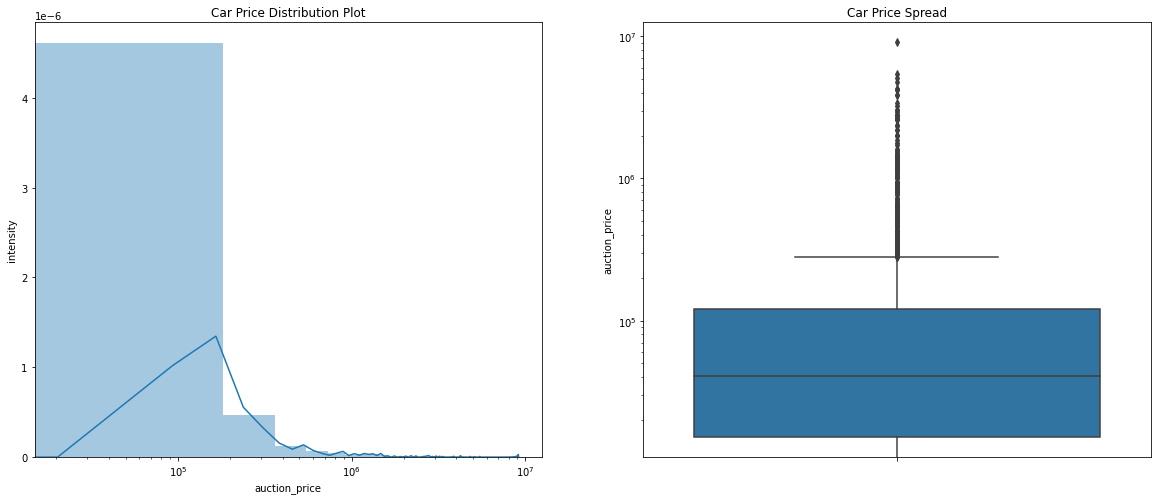

In [88]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
ax = sns.distplot(df.auction_price)
ax.set(ylabel='intensity')
ax.set_xscale("log")



plt.subplot(1,2,2)
plt.title('Car Price Spread')
g = sns.boxplot(y = df.auction_price)
g.set_yscale("log")
plt.show()


In [89]:
print("Mean:",df.auction_price.mean())
print("Std:",df.auction_price.max())
print("Min:",df.auction_price.min())
print("Median:",df.auction_price.median())
print(df.auction_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

Mean: 151346.68108108107
Std: 9109012.0
Min: 0.0
Median: 41000.0
count    2.405000e+03
mean     1.513467e+05
std      4.415144e+05
min      0.000000e+00
25%      1.511000e+04
50%      4.100000e+04
75%      1.203600e+05
85%      1.921840e+05
90%      2.740000e+05
100%     9.109012e+06
max      9.109012e+06
Name: auction_price, dtype: float64


[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car Brand')]

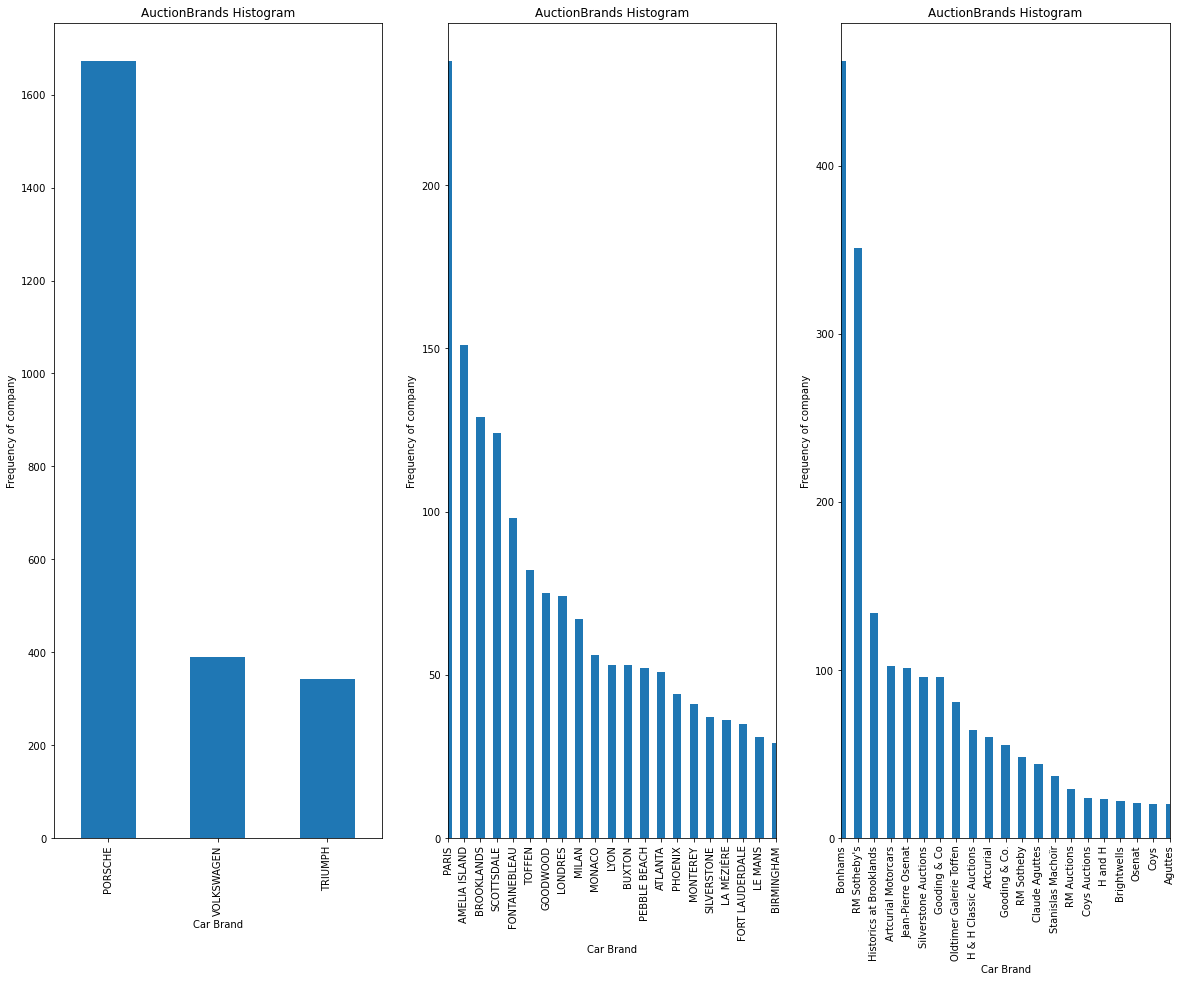

In [90]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
plt1 = df['auction_brand'].value_counts().plot(kind='bar')
plt.title('AuctionBrands Histogram')
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of company')

plt.subplot(1,3,2)

plt1 = df['auction_location'].value_counts().plot(kind='bar')
plt.title('AuctionBrands Histogram')
plt.xlim([0, 20])
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of company')

plt.subplot(1,3,3)
plt1 = df['auction_organizor'].value_counts().plot(kind='bar')
plt.title('AuctionBrands Histogram')
plt.xlim([0, 20])
plt1.set(xlabel = 'Car Brand', ylabel='Frequency of company')



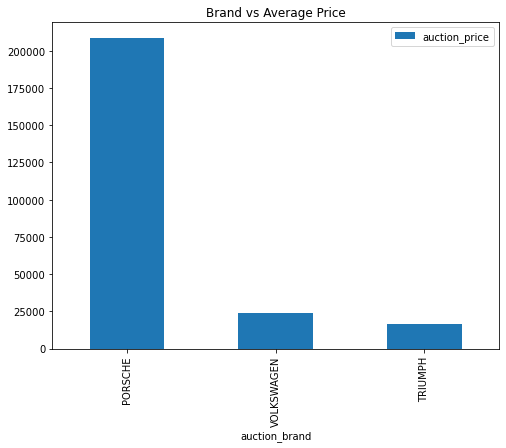

In [91]:
dff1 = pd.DataFrame(df.groupby(['auction_brand'])['auction_price'].mean().sort_values(ascending = False))
dff1.plot.bar(figsize=(8,6))
plt.title('Brand vs Average Price')
plt.show()




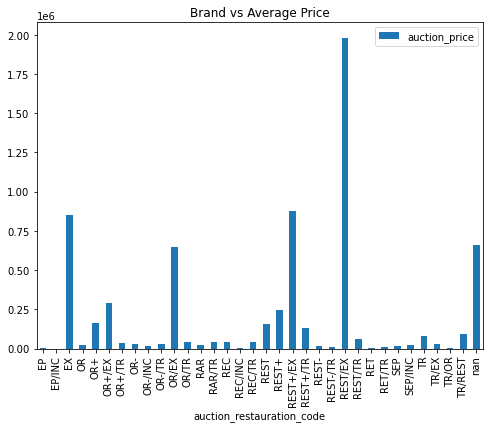

In [92]:
dff1 = pd.DataFrame(df.groupby(['auction_restauration_code'])['auction_price'].mean())
dff1.plot.bar(figsize=(8,6))
plt.title('Restuaration code vs Average Price')
plt.show()


In [93]:
print(df.columns)

Index(['auction_brand', 'auction_date', 'auction_location', 'auction_model',
       'auction_organizor', 'auction_company', 'auction_price',
       'auction_restauration_code', 'auction_sales_code', 'quote_id'],
      dtype='object')


In [115]:
dff1 = pd.DataFrame(df.groupby(['auction_brand'])['auction_price'].mean().sort_values(ascending = False))
# dff1 = dff1.sort_values(by=['auction_company'])
print(dff1)
# dff1.plot.bar(figsize=(8,6))
# plt.title('Brand vs Average Price')
# plt.show()

               auction_price
auction_brand               
PORSCHE        208729.684211
VOLKSWAGEN      23794.594872
TRIUMPH         16655.521866


In [126]:
dft = df.loc[df['auction_brand'] == 'TRIUMPH']
dft.dtypes


auction_brand                        object
auction_date                 datetime64[ns]
auction_location                     object
auction_model                        object
auction_organizor                    object
auction_company                      object
auction_price                       float64
auction_restauration_code            object
auction_sales_code                   object
quote_id                             object
dtype: object

In [139]:
df.to_csv()

',auction_brand,auction_date,auction_location,auction_model,auction_organizor,auction_company,auction_price,auction_restauration_code,auction_sales_code,quote_id\r\n1,VOLKSWAGEN,2019-02-08,PARIS,Typ 166 Schwimmwagen,Artcurial,Artcurial,119200.0,REST,V,6968\r\n2,VOLKSWAGEN,2013-03-25,BRUXELLES,Typ 166 Schwimmwagen,Pierre Bergé & Associés,Pierre,132000.0,REST+,V,6968\r\n3,VOLKSWAGEN,2012-08-12,NYSTED,Typ 166 Schwimmwagen,RM Auctions,RM,112560.0,RAR,V,6968\r\n4,VOLKSWAGEN,2009-11-13,LE GUA,Typ 166 Schwimmwagen,Hermann Historica,Hermann,84000.0,REST,V,6968\r\n5,VOLKSWAGEN,2008-06-14,LE GUA,"Typ 166 ""Schwimmwagen""",Hermann Historica,Hermann,120000.0,REST,V,6968\r\n6,VOLKSWAGEN,2008-05-10,MONACO (BONHAMS),"Typ 166 Schwimmwagen, moteur 1300",Bonhams SAM,Bonhams,130000.0,REST+/TR,V,6968\r\n7,VOLKSWAGEN,2007-11-12,VIMOUTIERS,"Typ 166 Schwimmwagen, moteur plus récent",Demade Enchères,Demade,68000.0,RAR/TR,V,6968\r\n9,VOLKSWAGEN,2016-06-19,FONTAINEBLEAU,Coccinelle 1302 coach,Jean-Pierre Osenat,

In [141]:
df.to_csv("dataframe2")